In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
generation_categories_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generation_categories.npy")
generation_categories_ppo = np.load("ckpts/ppo_ctrex_llama7B_commit50_idk10/best_checkpoint/hf_model/generation_categories.npy")
generation_categories_ppo2 = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories.npy")

In [4]:
files = ["ood_points_0", "ood_points_1_2", "ood_points_3_8", "ood_points_9_32", "ood_points_33+"]
num_mentions = ["0", "1-2", "3-8", "9-32", "33+"]
files = ["custom_trex/"+f+".npy" for f in files]

In [5]:
sft_accuracies = []
ppo_accuracies = []
ppo_selective_accuracies = []
ppo_idk_fracs = []

ppo_accuracies2 = []
ppo_selective_accuracies2 = []
ppo_idk_fracs2 = []


for i in range(len(files)):
    idxs = np.load(files[i])
    sft_accuracy = (generation_categories_sft[idxs, 1].mean())
    ppo_accuracy = (generation_categories_ppo[idxs, 1].mean())
    ppo_selective_accuracy = (generation_categories_ppo[idxs, 1].mean()/(1-generation_categories_ppo[idxs, 3].mean()))
    ppo_idk_frac = (generation_categories_ppo[idxs, 3].mean())
    sft_accuracies.append(sft_accuracy)
    ppo_accuracies.append(ppo_accuracy)
    ppo_selective_accuracies.append(ppo_selective_accuracy)
    ppo_idk_fracs.append(ppo_idk_frac)

    ppo_accuracy2 = (generation_categories_ppo2[idxs, 1].mean())
    ppo_selective_accuracy2 = (generation_categories_ppo2[idxs, 1].mean()/(1-generation_categories_ppo2[idxs, 3].mean()))
    ppo_idk_frac2 = (generation_categories_ppo2[idxs, 3].mean())
    ppo_accuracies2.append(ppo_accuracy2)
    ppo_selective_accuracies2.append(ppo_selective_accuracy2)
    ppo_idk_fracs2.append(ppo_idk_frac2)


Text(0.5, 0, 'Number of mentions in pretraining corpus')

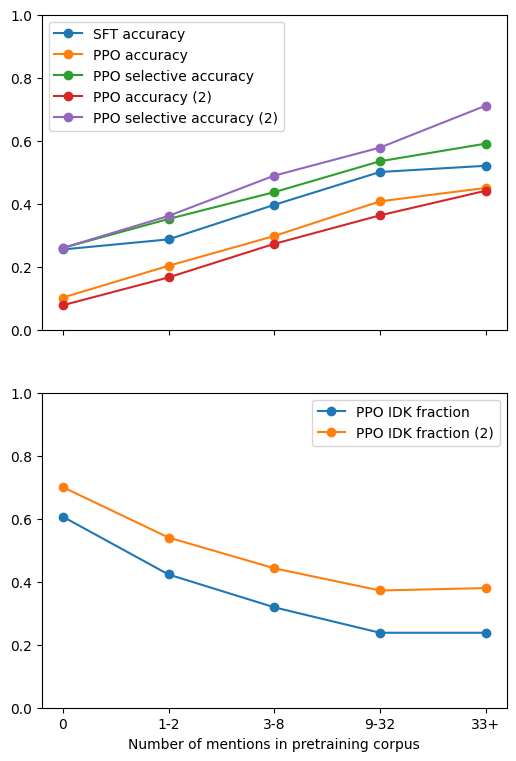

In [6]:
# make 2 subplots vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9), sharex=True)
ax1.plot(sft_accuracies, "o-", label="SFT accuracy")
ax1.plot(ppo_accuracies, "o-", label="PPO accuracy")
ax1.plot(ppo_selective_accuracies, "o-",label="PPO selective accuracy")
ax1.plot(ppo_accuracies2, "o-", label="PPO accuracy (2)")
ax1.plot(ppo_selective_accuracies2, "o-",label="PPO selective accuracy (2)")

ax1.set_ylim(0, 1)
ax1.legend()

ax2.plot(ppo_idk_fracs, "o-",label="PPO IDK fraction")
ax2.plot(ppo_idk_fracs2, "o-",label="PPO IDK fraction (2)")
ax2.set_ylim(0, 1)
ax2.legend()

ax2.set_xticks(np.arange(len(num_mentions)))
ax2.set_xticklabels(num_mentions)
ax2.set_xlabel("Number of mentions in pretraining corpus")
